#__Unsupervised Learning__#

##__Agenda__##

- Unsupervised Learning
- Principal Component Analysis
- DBSCAN
- Correspondence Analysis
- Singular Value Decomposition
- Independent Component Analysis
- Balanced Iterative Reducing and Clustering Using Hierarchies (BIRCH)

##__1. Unsupervised Learning__##

Unsupervised learning involves training algorithms on unlabeled data to autonomously uncover patterns and structures without explicit guidance.

Unlike supervised learning, where the algorithm learns from labeled data, unsupervised learning works with unlabeled data. Without specific outputs to guide the learning process, unsupervised learning algorithms explore the data, look for patterns, and try to learn the underlying structure present in the dataset.

Common techniques used in unsupervised learning include clustering, dimensionality reduction, and association rule learning.

##__2. Principal Component Analysis (PCA)__##


Principal Component Analysis (PCA) is a statistical technique for dimensionality reduction in data analysis. It simplifies the complexity of high-dimensional data while preserving trends and patterns.

Real-world problems typically deal with datasets that have a huge number of features.


Example: High-resolution images that need classification or power allocation exercises across multiple communication channels that have high dimensionality. Dealing with such datasets demands increased computational power and more complex algorithms, which may lead to overfitting.



Principal Component Analysis (PCA) is an unsupervised learning technique used to preprocess datasets and reduce their dimensionality while preserving the original dataset.

###__2.1 Common Terms in PCA__###

- Dimensionality: It is the number of features present in the data.

- Correlation: It indicates the strength of the relationship between features. The correlation value ranges between -1 and +1. It is -1 when variables are inversely proportional and +1 when they are directly proportional.

- Orthogonality: It is used when variables are not correlated.

- Eigenvector: It is given a square matrix (m) and a nonzero vector (v), and v is the eigenvector if Av is a scalar multiple of v.

- Covariance Matrix: it is a matrix containing the covariance between variables.













###__2.2 Steps of PCA__###

1. Standardization
2. Covariance and matrix computation
3. Identifying the principal components
4. Feature vector
5. Recasting data along the principal component axes



###__Standardization__###


Standardization ensures that the range of variables is standardized so that each variable contributes equally.


Standardization transforms data by rescaling it to have a mean of 0 and a standard deviation of 1, ensuring consistent ranges and making it more suitable for comparison and analysis across different variables.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/standadization.png)

This normalization process mitigates the dominance of variables with larger ranges over those with smaller values.


###__Covariance Matrix Computation__###


It helps to check the correlation between features in a dataset.

Types of covariance:

Positive covariance indicates a direct correlation.

Negative covariance indicates an inverse correlation.



The covariance matrix provides a summary of the relationships (correlations) between variables in a tabular representation.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/covariance.png)

###__Identifying Principal Components__###

In this step, the new non-correlated variables constructed by compressing features are identified.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/identifying_principal_components.png)

###__Feature Vector__###

This is also the first dimensionality reduction step.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/feature_vector.png)

This step helps determine whether the previously identified PCA features need to be retained or discarded.


###__Recasting Data Along Principal Component Axes__###


The data is reoriented from its original axes to new axes represented by the identified principal components.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/finaldataset.png)

This is done by multiplying the transpose of the feature vector by the transpose of the original dataset.


###__2.3 Uses of PCA__###

PCA compresses information into a smaller set with new dimensions.


- In neuroscience, it identifies the action potential of neurons by their shape.
- In quantitative finance, it reduces the complexity of stock analysis.


Let's implement PCA.

- Import the **matplotlib.pyplot, pandas, NumPy, Seaborn,** and **sklearn** libraries.
- Load the breast cancer dataset from sklearn.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

__Observation:__
- The cancer 'DESCR' provides all the information regarding the cancer dataset.


- Create a DataFrame from the cancer dataset.


In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


__Observation:__
- The DataFrame contains cancer data with feature names as columns.

- Instantiate a StandardScaler object and fit it to the data.
- Transform the data using the StandardScaler object.


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


- Import PCA from sklearn.decomposition.
- Instantiate a PCA object with two components.
- Fit PCA to the scaled data.
- Transform the scaled data using PCA.
- Check the shape of the transformed data.


In [7]:
from sklearn.decomposition import PCA
pca = PCA()

In [8]:
pca.fit(scaled_data)

PCA()

In [10]:
pca.explained_variance_ratio_*100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

In [13]:
import numpy as np

np.cumsum(pca.explained_variance_ratio_*100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

In [52]:
pca = PCA(n_components=14)
pca.fit(scaled_data)
cmps = pca.transform(scaled_data)

In [53]:
cmps.shape

(569, 14)

In [55]:
pca.components_.shape

(14, 30)

In [15]:
scaled_data.shape

(569, 30)

In [16]:
cmps.shape

(569, 10)

In [18]:
pd.DataFrame(cmps)

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877401
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116977
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256987
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105208,-0.108633
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542034,-0.089296


In [21]:
pd.DataFrame(pca.components_,index=["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"],columns=df.columns)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
C1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
C2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
C3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
C4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
C5,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
C6,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
C7,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
C8,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152323,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
C9,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112142,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060489,0.064638,-0.134174
C10,0.095486,0.240934,0.086385,0.074956,-0.069293,0.012938,-0.135603,0.008054,0.572070,0.081103,...,0.077361,0.029552,0.050508,0.069922,-0.128305,-0.172132,-0.311639,-0.076647,-0.029564,0.012609



- Create a scatter plot of the two principal components with the target variable as the color.

In [22]:
pca = PCA(n_components=0.98)
pca.fit(scaled_data)

PCA(n_components=0.98)

In [25]:
pca.transform(scaled_data).shape

(569, 14)

In [28]:
# we can build a classifier on top of cmps
y = cancer['target']

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier()

In [32]:
model.fit(cmps,y)

DecisionTreeClassifier()

In [33]:
model.score(cmps,y)

1.0


- Display the PCA component matrix.
- Display the explained variance.


In [13]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [14]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

##__3. DBSCAN__##

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.


DBSCAN is a popular unsupervised machine learning algorithm primarily used for clustering tasks, where the goal is to group closely packed data points based on some notion of distance.It identifies points that are alone in low-density regions as outliers or noise.



Below are the advantages of DBSCAN:


- It does not require specifying the number of clusters a priori, unlike K-means.
- It can find arbitrarily shaped clusters that other clustering algorithms might not find.
- It is robust to outliers; points that don’t belong to a cluster are treated as noise.


DBSCAN is widely used in various domains, such as anomaly detection, spatial data analysis, and image segmentation, due to its simplicity and effectiveness with spatial data.


##__4. Correspondence Analysis__##


Correspondence analysis is a multivariate statistical tool used to study the associations between two variables.
-  It starts with a large table that is difficult to read and ends with a relatively simple visualization.
- The analysis is based on the idea of representing the data as points in a low-dimensional space.
- These points are then used to visualize the relationships between the different categories of data.

The primary goal is to represent as much inertia as possible on the first principal axis, the maximum residual inertia on the second principal axis, and so forth.


The following image shows correspondence analysis done for the traits of certain animals:


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/correspondence_anlysis.png)

 In the visualization, animals are plotted in rows, and traits are plotted in columns.

##__5. Correspondence Analysis__##

Correspondence analysis is a statistical method for visualizing the association between categorical variables in a contingency table. For example, correspondence analysis indicates that cats and dogs are most similar, whereas dogs and cockroaches are least similar.


- To compare a row label to a column label, observe the length of the line connecting the row label to the origin.

- The longer the line, the stronger the association between the row label and the column label.


###__Multiple Correspondence Analysis__###

Multiple correspondence analysis (MCA) is an extension of correspondence analysis that explores the relationships among multiple variables.


It helps one conduct correspondence analysis if there is a table with:

- At least two rows and two columns
- No missing data
- No negative values
- All the data with the same scale


##__6. Singular Value Decomposition__##

Singular Value Decomposition (SVD), a powerful tool in linear algebra, is a data reduction method used in machine learning. It enables the extraction and untangling of information from high-dimensional raw data.



It is a matrix decomposition technique that decomposes a matrix into three generic and familiar matrices.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/singular_value_decomposition.png)

It makes certain subsequent matrix calculations simpler with matrices that are easy to manipulate and analyze.


The formula is as follows:


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/svd_formula.png)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/svd_formula2.png)

SVD breaks a matrix down into singular vectors.


It has uses in machine learning and is the foundation of the recommendation algorithms that power well-known brands, like:
- Amazon
- Youtube
- Google
- Facebook

Now let's see the implementation of Singular Vector Decomposition.

- Import **pandas** and **NumPy** libraries.
- Create the **post_words** DataFrame.


In [15]:
import pandas as pd

c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


__Observation:__
- Here, you can see the DataFrame with its rows representing different words.

- Create the column space of the data **U** and the row space of the data **V**.
- Calculate the SVD using NumPy.
- Display the V matrix.


In [16]:
import numpy as np

U, sigma, V = np.linalg.svd(post_words)
print(np.round(V, decimals=2))

[[-0.4  -0.57 -0.63 -0.35]
 [-0.6   0.33  0.41 -0.6 ]
 [ 0.6  -0.41  0.32 -0.61]
 [-0.34 -0.63  0.58  0.39]]


__Observation:__
- The diagonal values in **sigma** are always in descending order, and you can see that the vectors are also placed in that corresponding order.

In [17]:
sigma

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

__Observation:__
- Here, the singular values in sigma have been created.

- Calculate the approximate dataset using the first two components.
- Display the approximation and the error from the actual values.





In [18]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])

print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946


__Observation:__
- A was calculated using only the first two components, and an approximate A was obtained by multiplying the matrix U and V.

In [19]:
print("\nError from actual value:\n")
print(post_words - A_approx)


Error from actual value:

          post1     post2     post3     post4
word:                                        
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


__Observation:__
- Here, you can see the difference from the actual by the approximate value of A.

- Import matplotlib.pyplot.
- Plot the V matrix as an image.
- Pass the c_names values to the xticks and the words to the yticks.
- Initialize ax.
- Declare the title as SVD.
- Plot the colorbar.


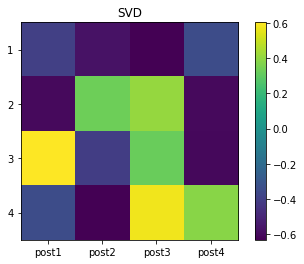

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("SVD")
plt.colorbar();

__Observations:__
- Here, you can see the singular value decomposition plot.
- Notice that the lighter blue of post 1 and post 4 of row 1 have similar values.

- Display the second column of the U matrix.


In [21]:
pd.DataFrame(U[:,1], index=words)

,0
ice,0.018526
snow,-0.678291
tahoe,-0.519801
goal,0.370263
puck,0.363717


__Observations:__
- Here, you can see that snow and tahoe are identical, whereas goal and puck have similar values.

__Conclusion__

This is how you can apply single value decomposition or SVD.

##__7. Independent Component Analysis__##


Independent component analysis (ICA) is a machine learning technique used to distinguish independent sources from a mixed signal.
While principal component analysis focuses on maximizing the variance of the data points, independent component analysis focuses on the independence of the components.


Example: Microphone placement on the stage of a reality show

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/independent_component_analysis.png)

- Number of speakers = Number of microphones
- M1, M2, and M3 are microphones installed at different distances from each of them, recording the voice signals passed by them.
- P1, P2, and P3 are three people present in the show.


The goal is to separate the three speakers’ voices from the microphone recordings.


It helps separate the mixed signals of each microphone recording into independent speech signals.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_06/p1p2p3.png

The features of ICA include:
- It segregates the mixed signal into its independent source signals.
- It deals with the independent components.
- It gives priority to the mutual independence of the components.

ICA has the following restrictions:
- Each independent component created by the ICA is statistically independent of others.
- The independent components generated by the ICA are equal to the number of observed mixtures.
- The components generated by the ICA have a non-Gaussian distribution.


Now let's see the implementation of ICA.

- Import **FastICA** from **sklearn.decomposition, matplotlib.pyplot,** and **pandas**.
- Configure the matplotlib settings.
- Read the input data from a CSV file.
- Print the first 10 rows of the data.

In [22]:
%matplotlib inline
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import pandas as pd
InpData=pd.read_csv('SurveyData.csv')
print(InpData.head(10))

   rating  complaints  privileges  learning  raises  critical  advance
0      43          51          30        39      61        92       45
1      63          64          51        54      63        73       47
2      71          70          68        69      76        86       48
3      61          63          45        47      54        84       35
4      81          78          56        66      71        83       47
5      43          55          49        44      54        49       34
6      58          67          42        56      66        68       35
7      71          75          50        55      70        66       41
8      72          82          72        67      71        83       31
9      67          61          45        47      62        80       41


__Observation:__
- The first ten rows of the dataset are displayed here.

In [23]:
InpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rating      30 non-null     int64
 1   complaints  30 non-null     int64
 2   privileges  30 non-null     int64
 3   learning    30 non-null     int64
 4   raises      30 non-null     int64
 5   critical    30 non-null     int64
 6   advance     30 non-null     int64
dtypes: int64(7)
memory usage: 1.8 KB


__Observation:__
- You can see that there are no missing values.

- Create an ICA object with two components.
- Fit and transform the input data using the ICA object.

In [24]:
ICA = FastICA(n_components=2, whiten='unit-variance')
IndependentComp_values = ICA.fit_transform(InpData.values)

- Print the independent component.
- Create a DataFrame with column names **Independent component 1 and 2.**

In [25]:
print('##final Independent Components##')
reducedata = pd.DataFrame(data=IndependentComp_values, columns=['IC1', 'IC2'])
print(reducedata.head(10))

##final Independent Components##
        IC1       IC2
0 -1.766163 -1.217184
1 -0.264297 -0.134367
2 -0.691836  1.105086
3  0.186171 -0.706382
4  0.317359  0.981930
5  0.446568 -1.496487
6  0.457773 -0.480947
7  0.886442  0.143353
8  0.929591  0.934783
9  0.003783 -0.433353


__Observations:__
- As you can see, here you have created a DataFrame with independent components.
- The first ten rows of the reduced data are displayed.

##__8. Balanced Iterative Reducing and Clustering Using Hierarchies (BIRCH)__##

It is an unsupervised clustering algorithm developed to process massive datasets. It then clusters this compact summary instead of the large dataset.

The algorithm is based on the following components:
- Clustering Feature
- Clustering Feature (CF) Tree


The clustering feature entry is a triplet of N, LS, and SS.

N = Number of data points in a cluster

LS = Linear sum of the data points

SS = Squared sum of the data points in the cluster

In this example:

CF = (N, LS, SS) = (5, (21,21), (91,102))


###__Clustering Feature Tree__###


A clustering feature tree is a tree with leaf and non-leaf nodes where each leaf node contains a subcluster.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/clustering_feature_tree.png)

Each entry of a CF tree has a pointer to the child node.
The CF tree entry is made by the sum of CF entries in the child node.


The BIRCH algorithm has four phases:

- Data scanning: The model loads data and then scans it, fitting it into CF trees.

- Data condensing: The algorithm adjusts the data size for better fitting into the CF tree.

- Global clustering: Using an existing algorithm, the CF trees undergo clustering.

- Clustering refinement: The algorithm corrects all incorrect assignments of observations.



The BIRCH algorithm has three parameters, they are:

- Threshold: Indicates the maximum number of observations that a subcluster can have

- Branching factor: Represents the number of CF subclusters in a node

- N clusters: Indicates the number of clusters


Now let's see the implementation of BIRCH.

- Import the **NumPy, matplotlib.pyplot, Seaborn**, and  **sklearn** libraries.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

- Generate a dataset with blobs using the **make_blobs** function.
- Plot the data points using a scatterplot.


In [ ]:
X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

__Observation:__
- You can see the scatter plot for X attributes.
- Here, the data has been divided into six different clusters.

- Create an instance of the BIRCH clustering model.
- Fit the model to the data.


In [ ]:
 brc = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
brc.fit(X)

__Observation:__
- The BIRCH model has been created here.

In [ ]:
Birch(n_clusters=None, threshold=1.5)
labels = brc.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

__Observations:__
- Here, you can see the scatter plot with six clusters.
- The algorithm has created six different clusters based on the dataset.
- This is how you can implement BIRCH to create different clusters.

##__Conclusion__##


In conclusion, unsupervised learning techniques are powerful tools for exploring and extracting meaningful insights from unlabeled data. By allowing algorithms to autonomously identify patterns and structures within datasets, you can uncover hidden relationships, detect anomalies, and gain a deeper understanding of the underlying data distribution. From clustering and dimensionality reduction to association rule learning, the applications of unsupervised learning are vast and diverse, spanning fields such as data analysis, pattern recognition, and anomaly detection.

# Classifier with PCA

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [35]:
X = cancer['data']
y = cancer['target']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test, y_train,y_test = train_test_split(X,y,random_state=0)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
pipeline_process_steps = [('scale',StandardScaler()),('dr',PCA(n_components=0.99)),('clf',DecisionTreeClassifier())]

In [50]:
model = Pipeline(steps=pipeline_process_steps)
model.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('dr', PCA(n_components=0.99)),
                ('clf', DecisionTreeClassifier())])

In [51]:
print("Train Score: ",model.score(x_train,y_train))
print("Test Score: ",model.score(x_test,y_test))

Train Score:  1.0
Test Score:  0.8951048951048951


In [59]:
model['dr'].components_

array([[ 2.21365239e-01,  1.00002186e-01,  2.29518109e-01,
         2.23520981e-01,  1.43022884e-01,  2.42110713e-01,
         2.60269250e-01,  2.64252721e-01,  1.34215403e-01,
         5.85049993e-02,  2.06864788e-01,  7.29622255e-03,
         2.09874216e-01,  2.02238408e-01,  1.72518718e-02,
         1.66390255e-01,  1.38559209e-01,  1.79940925e-01,
         2.94390431e-02,  1.01929667e-01,  2.30419562e-01,
         1.00571999e-01,  2.37796607e-01,  2.27510089e-01,
         1.31359787e-01,  2.10778835e-01,  2.30141898e-01,
         2.53344062e-01,  1.19116509e-01,  1.30882592e-01],
       [-2.30173200e-01, -5.72175515e-02, -2.13355030e-01,
        -2.26935339e-01,  1.78770408e-01,  1.47448613e-01,
         6.55746283e-02, -3.13406669e-02,  1.90507115e-01,
         3.63961224e-01, -1.05013647e-01,  9.39735986e-02,
        -9.74743957e-02, -1.49610324e-01,  2.12040027e-01,
         2.35434997e-01,  2.10509206e-01,  1.52280137e-01,
         1.81074900e-01,  2.78679424e-01, -2.15982904e-

In [60]:
model['dr']

/usr/local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[ 801.56122202, -759.03333167,   50.28162856, ..., -707.97684427,
        -482.29541298, -207.76068532],
       [ 840.23017519, -805.24413608,   43.58011299, ..., -673.7052938 ,
        -509.35582986,  -99.81325615],
       [ 758.94878819, -725.08694546,   45.87592287, ..., -587.03194143,
        -449.2883926 ,  -64.06741978],
       ...,
       [ 527.78480723, -503.30760577,   27.2591426 , ..., -388.81954835,
        -306.40228415,  -24.54099342],
       [ 810.13067836, -772.25020697,   43.43687499, ..., -631.95494435,
        -478.68418174,  -82.54431037],
       [ 140.64957365, -130.31442832,    5.25769586, ...,  -98.14069591,
         -73.03609417,  -12.11196047]])